# Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

from config import Config
from data_tools import create_general_analysis, get_iv_woe, get_oldpeak_cat
from visualization_tools import create_visualization_q, create_visualization_cat, create_visualization_target, \
    get_corr_map, create_metrics, create_cv, get_features_importances, get_shap
from ml_tools import get_trained_model

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
create_general_analysis(df)

General data analysis: 

Shape of the Data Frame:  (918, 12)
Duplicates in the Data Frame: 0, (0.0)


,values_num,nan_values_num,occupancy,unique_values_num,min_value,max_value,unique_values,dtype
Age,918,0,100.0,50,28,77,"[77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 6...",int64
Sex,918,0,100.0,2,F,M,"[M, F]",object
ChestPainType,918,0,100.0,4,ASY,TA,"[TA, NAP, ATA, ASY]",object
RestingBP,918,0,100.0,67,0,200,"[200, 192, 190, 185, 180, 178, 174, 172, 170, ...",int64
Cholesterol,918,0,100.0,222,0,603,"[603, 564, 529, 518, 491, 468, 466, 458, 417, ...",int64
FastingBS,918,0,100.0,2,0,1,"[1, 0]",int64
RestingECG,918,0,100.0,3,LVH,ST,"[ST, Normal, LVH]",object
MaxHR,918,0,100.0,119,60,202,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
ExerciseAngina,918,0,100.0,2,N,Y,"[Y, N]",object
Oldpeak,918,0,100.0,53,-2.6,6.2,"[6.2, 5.6, 5.0, 4.4, 4.2, 4.0, 3.8, 3.7, 3.6, ...",float64


# Data visualization and analysis

## Quantitative features

Visualization of quantitative features distribution: 


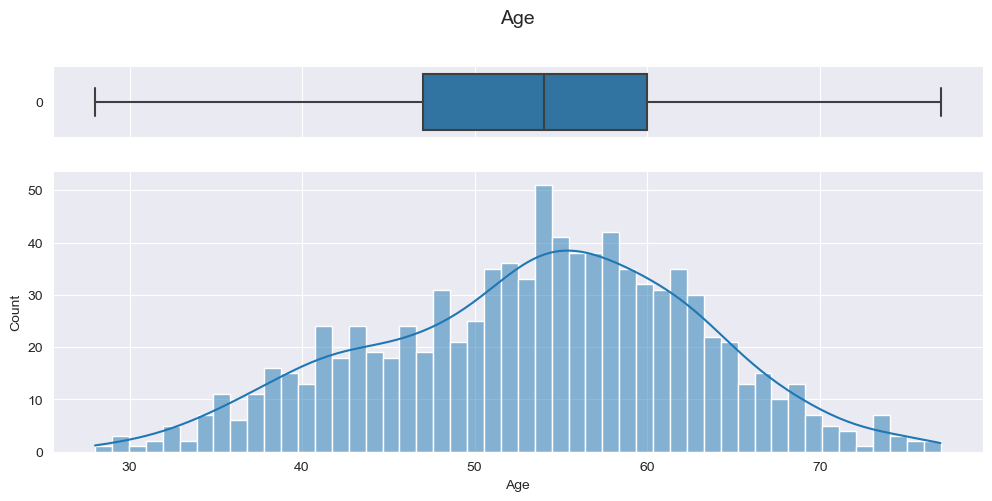

Feature statistics:


count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

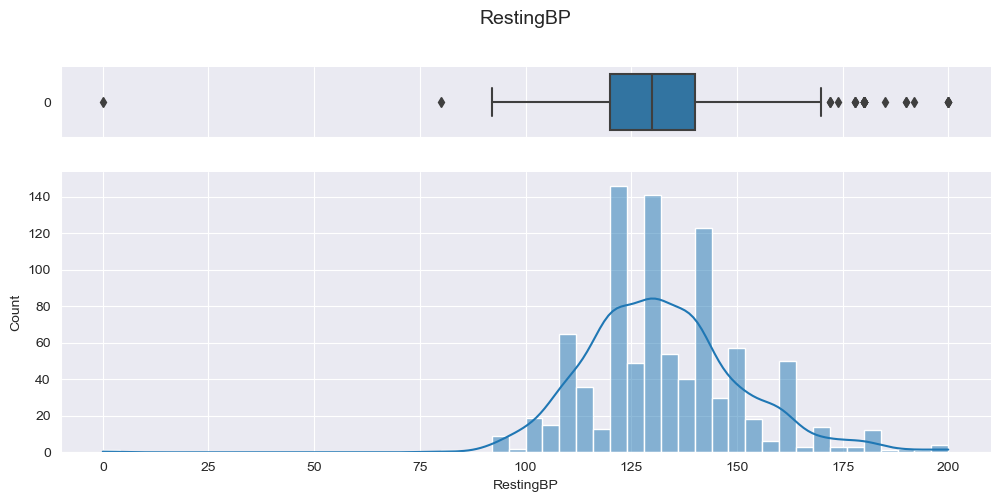

Feature statistics:


count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

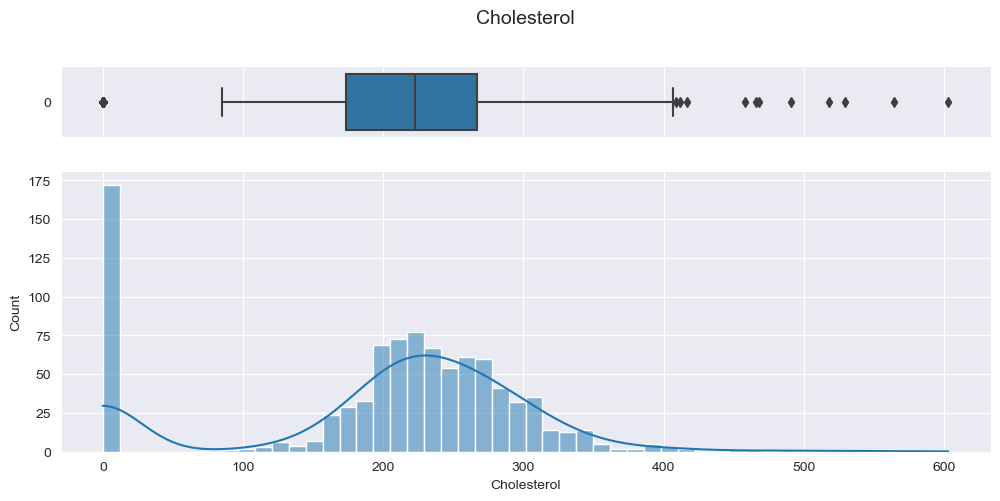

Feature statistics:


count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

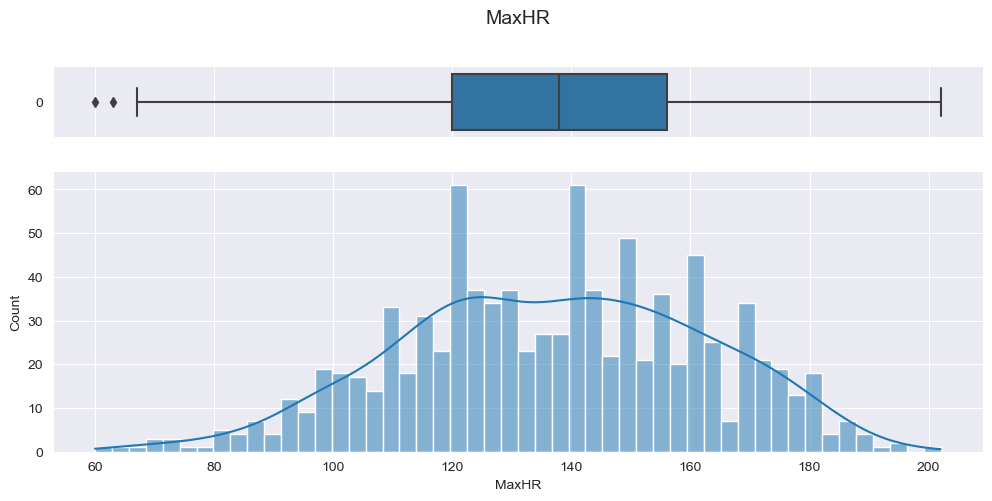

Feature statistics:


count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

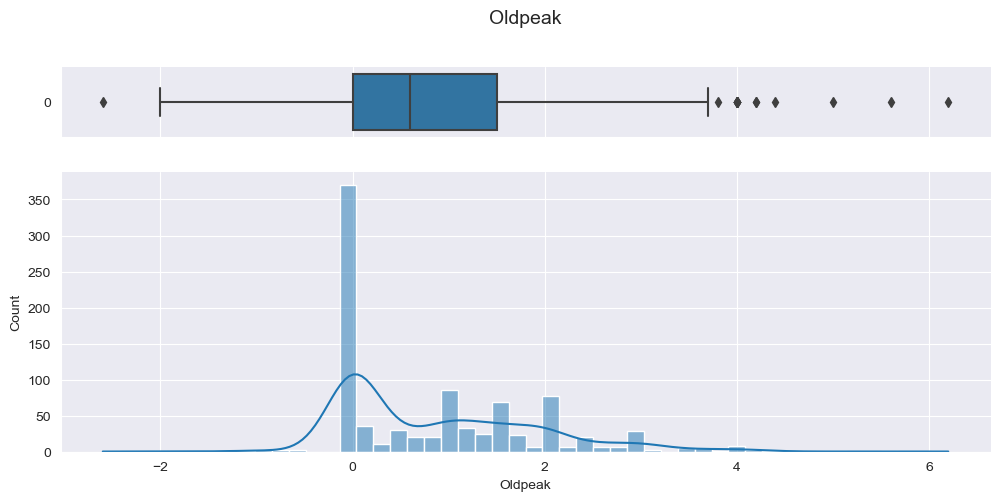

Feature statistics:


count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [4]:
create_visualization_q(df, 'HeartDisease')

## Categorical feauters

Visualization of categorical features and target prevalence:


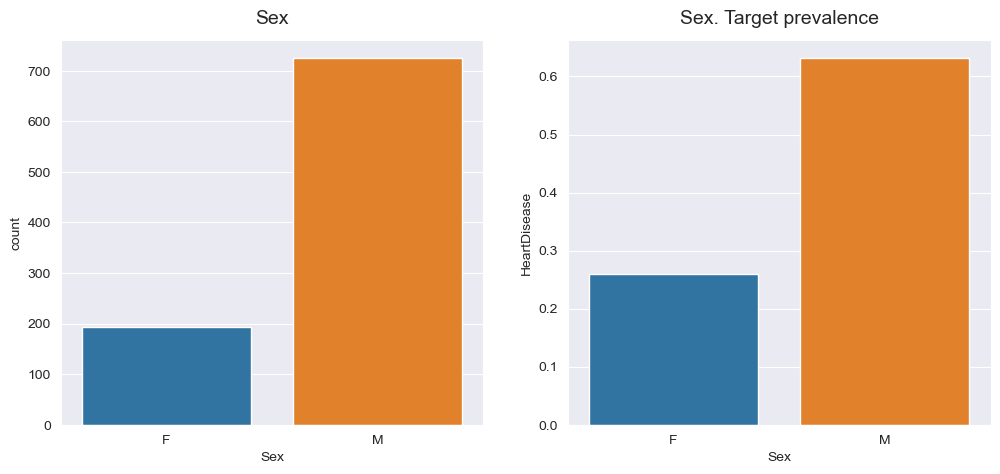

Feature statistics:


count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

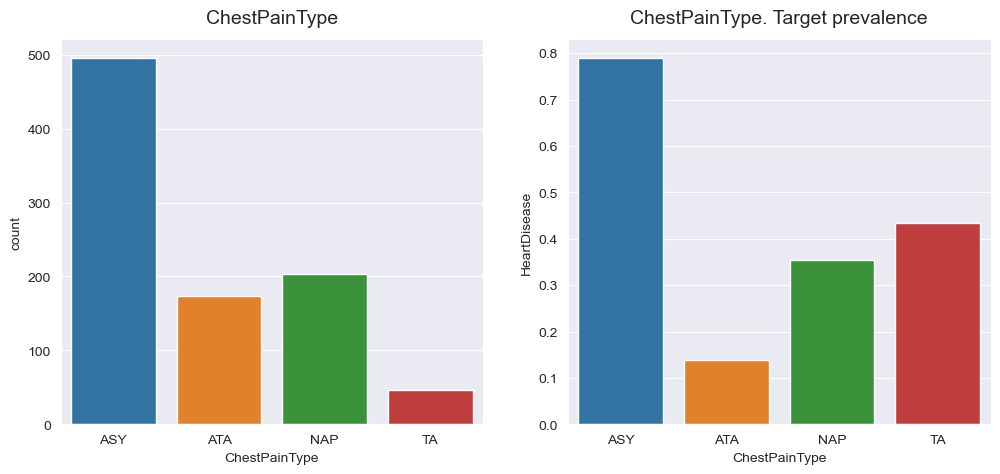

Feature statistics:


count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

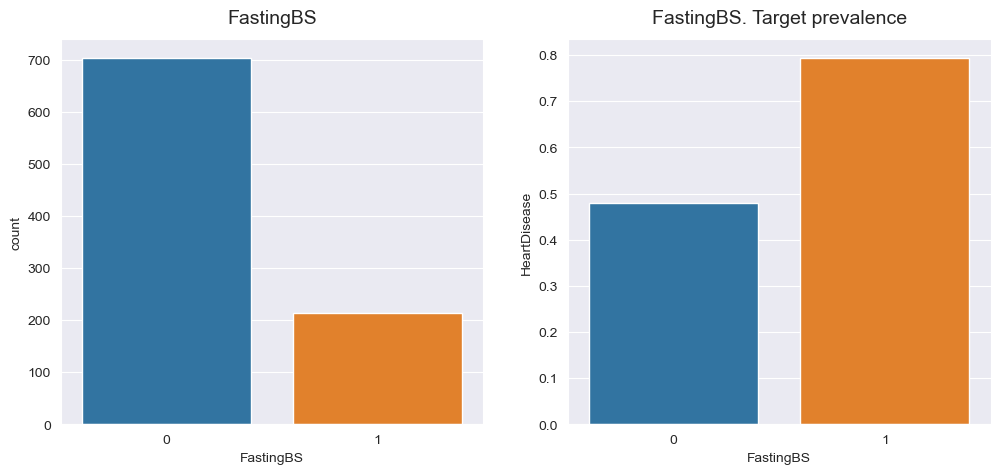

Feature statistics:


count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

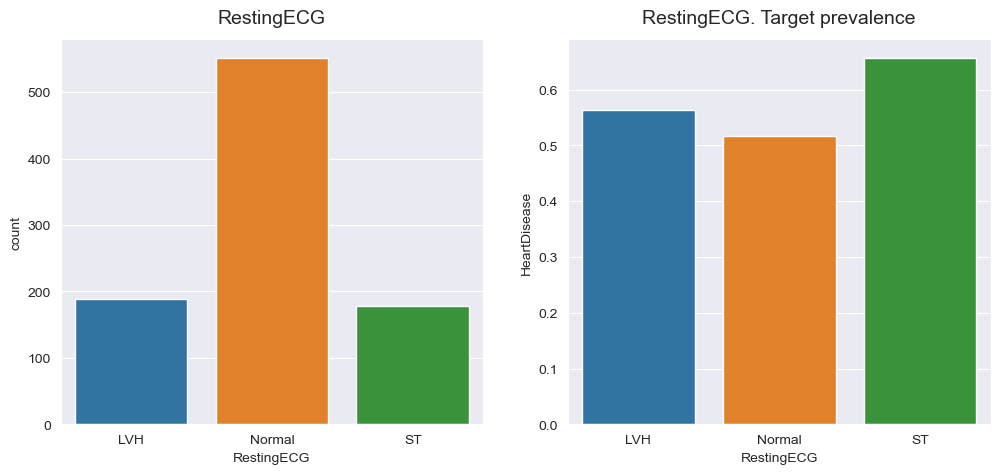

Feature statistics:


count        918
unique         3
top       Normal
freq         552
Name: RestingECG, dtype: object

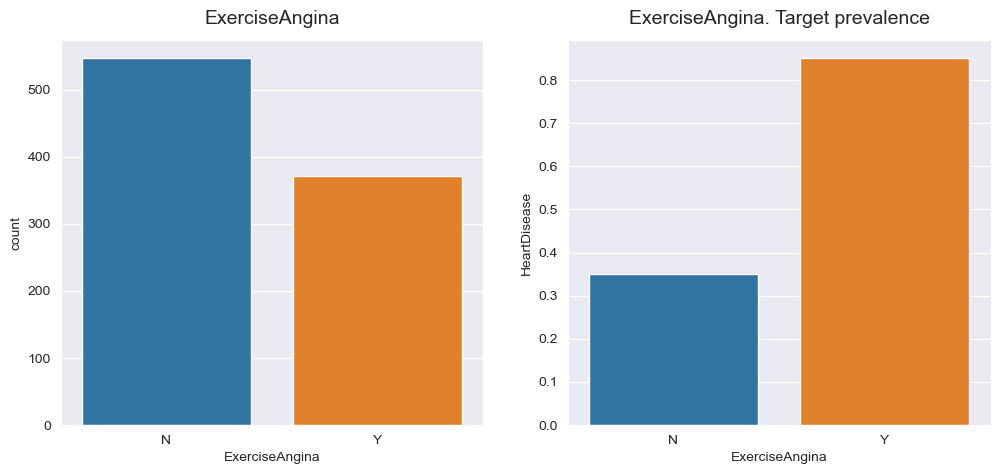

Feature statistics:


count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

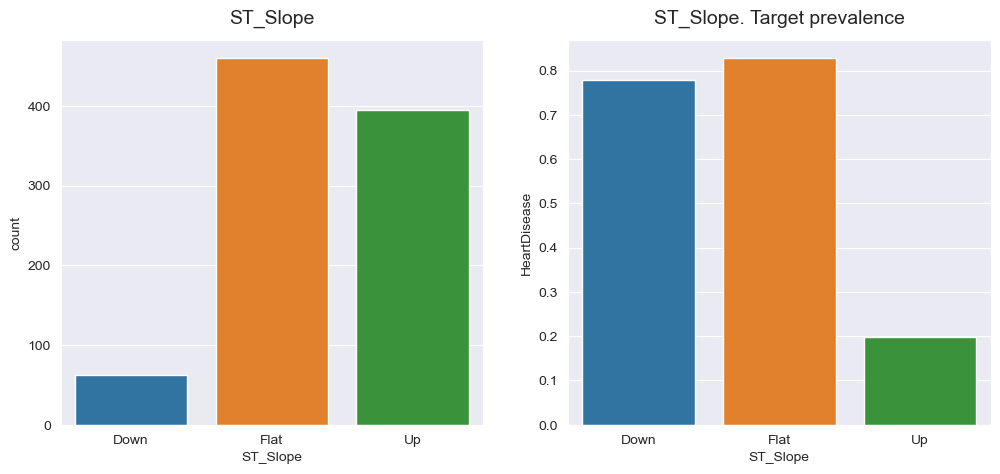

Feature statistics:


count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object

In [5]:
create_visualization_cat(data=df, target='HeartDisease')

## Target distribution

Visualization of target distribution:


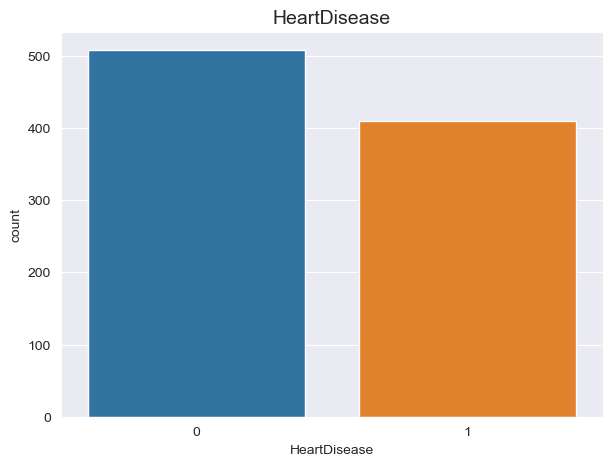

Target statistics:


count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [6]:
create_visualization_target(data=df, target='HeartDisease')

## Correlation between features and target

### Pearson correlation

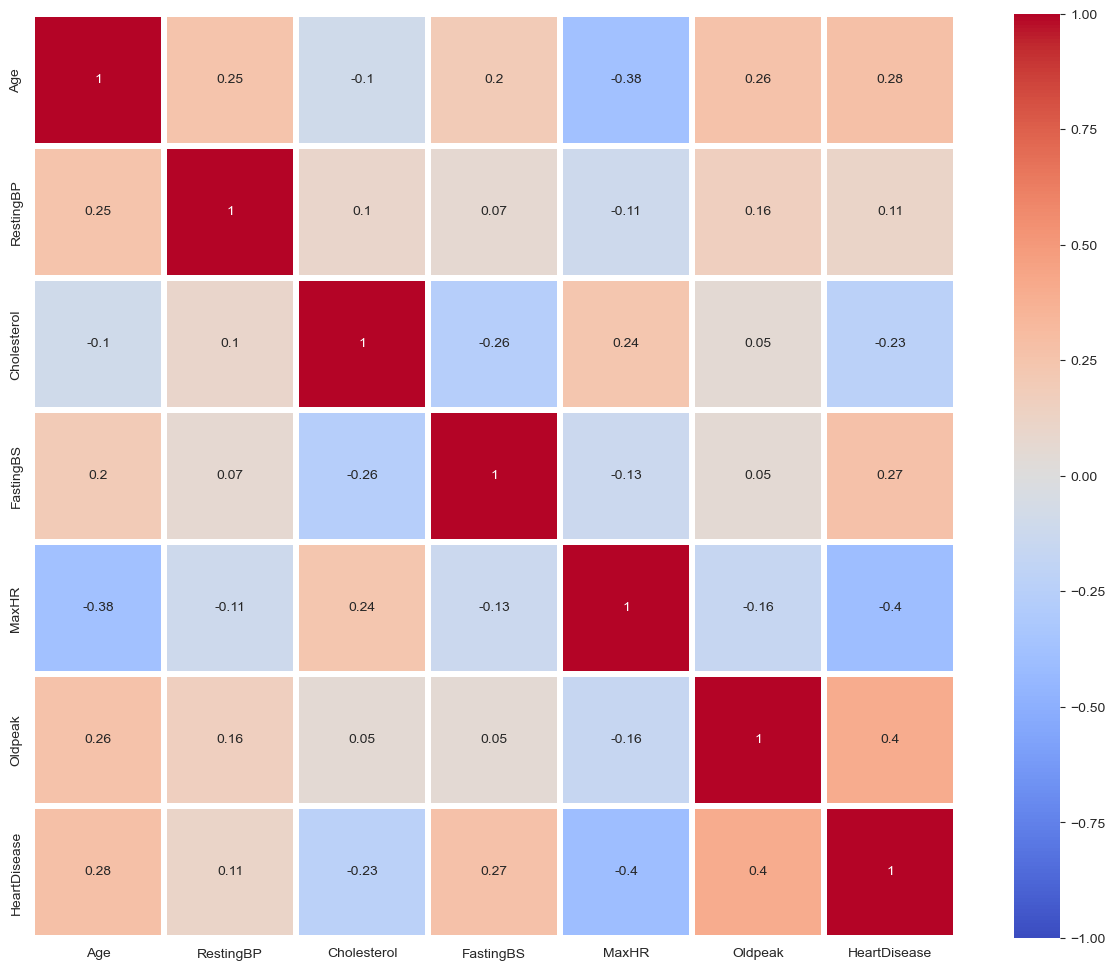

In [7]:
get_corr_map(df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1))

### Spearman correlation

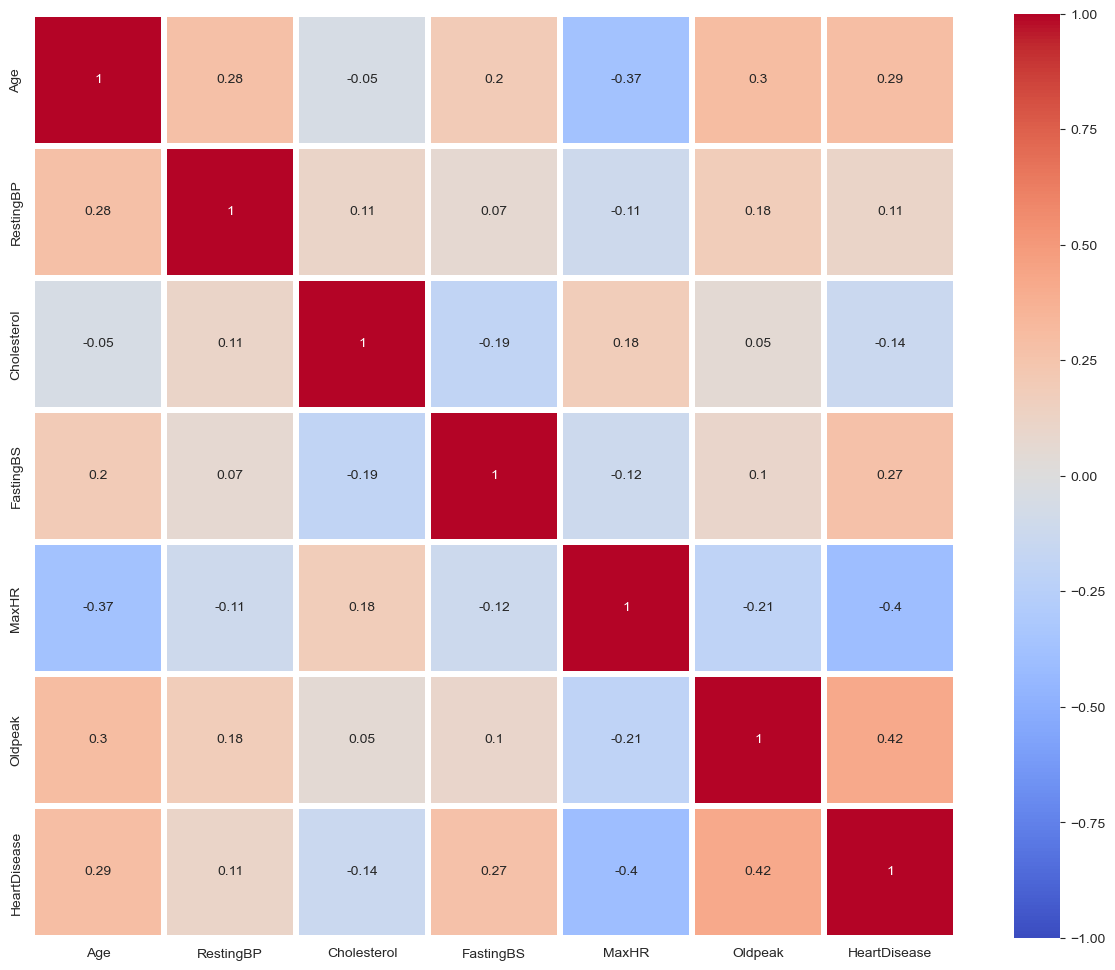

In [8]:
get_corr_map(df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1), method='spearman')

### Parameters pairplots

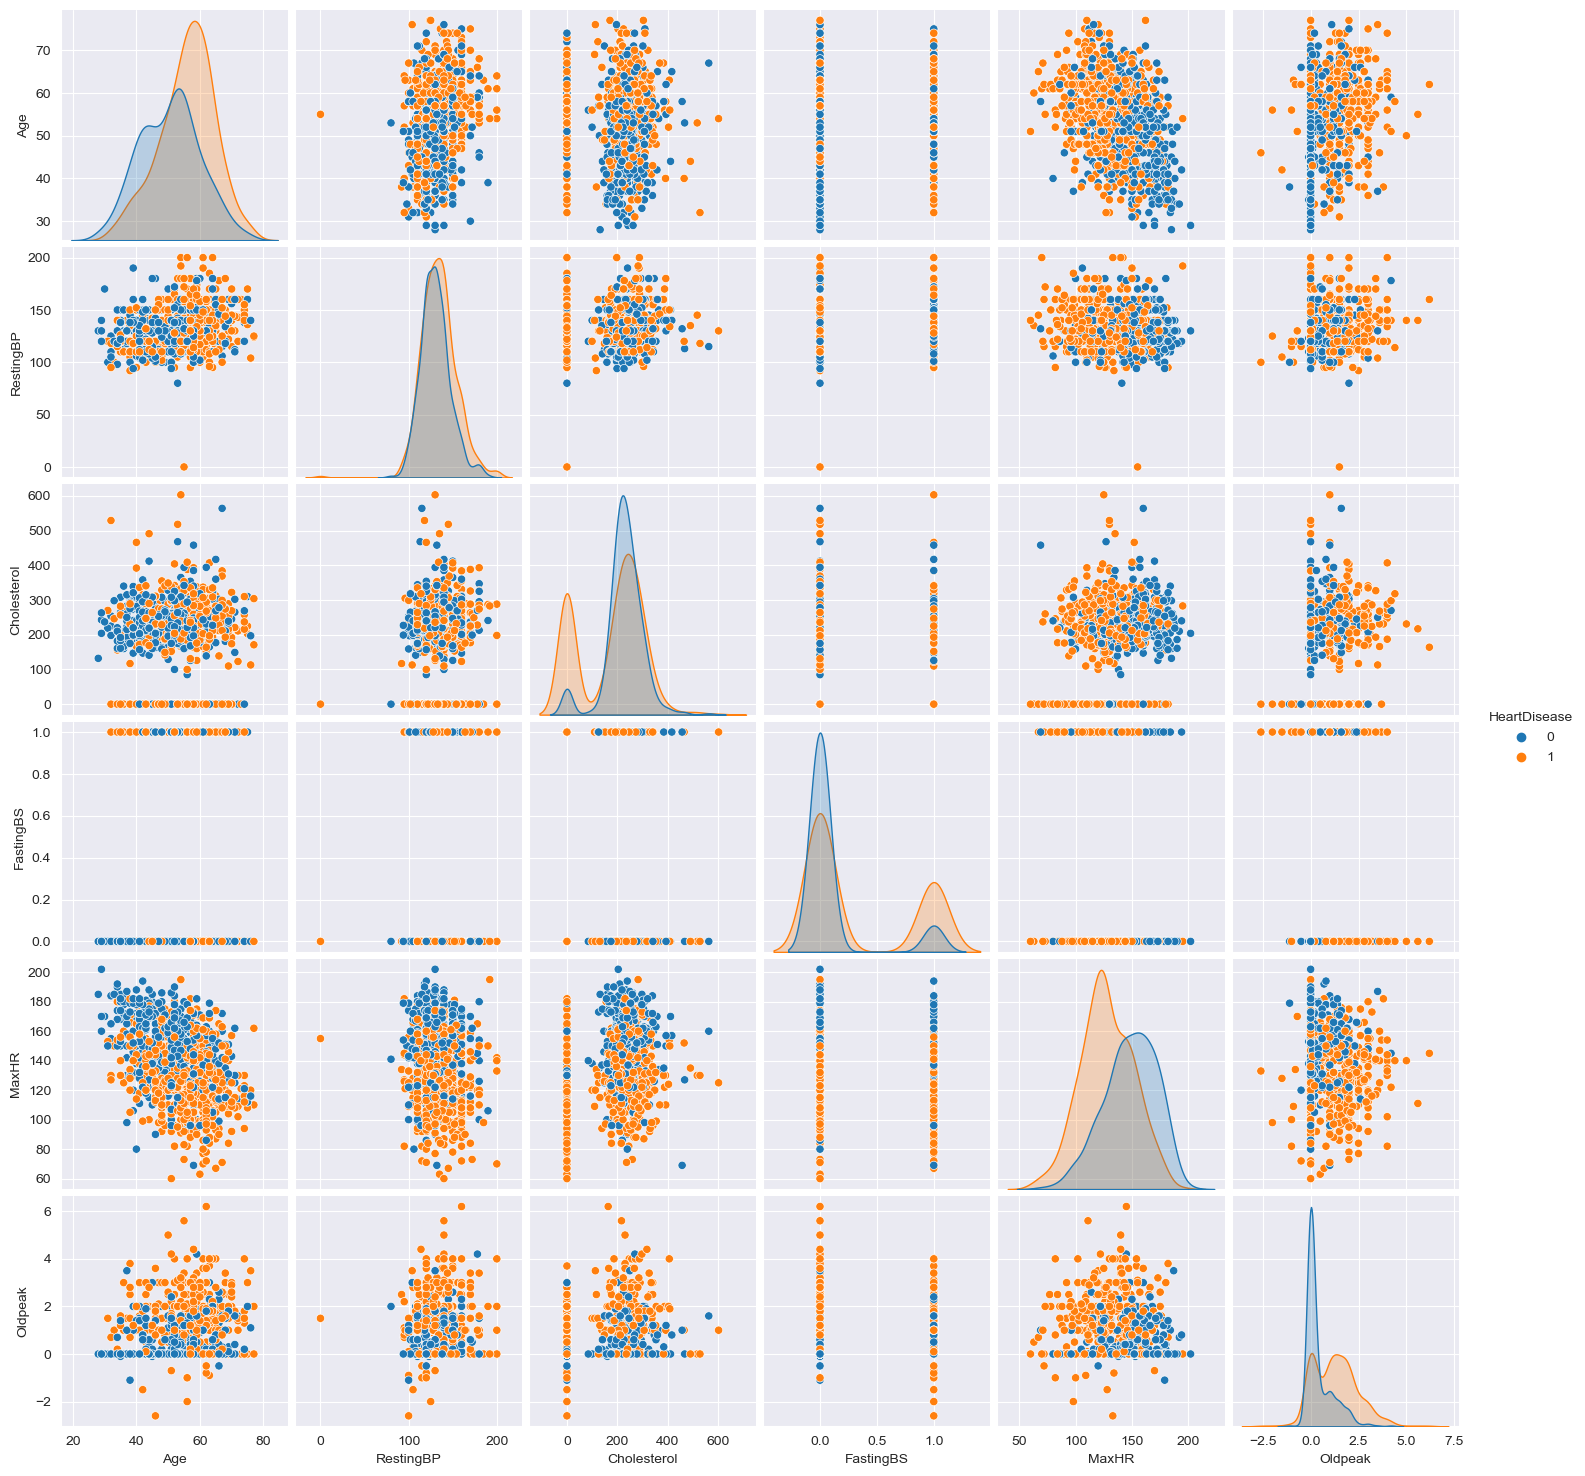

In [9]:
sns.pairplot(df, hue='HeartDisease')

# Feature information value and weight of evidence

In [10]:
iv, iv_woe = get_iv_woe(df, 'HeartDisease', 20)
iv

,feature,iv,number_of_classes,feature_null_percent,remark
0,Age,0.371875,4,0.0,binned monotonically
1,ChestPainType,1.377321,4,0.0,categorical
2,Cholesterol,0.106325,2,0.0,binned forcefully
3,ExerciseAngina,1.152925,2,0.0,categorical
4,FastingBS,0.325352,2,0.0,categorical
5,MaxHR,0.744990,6,0.0,binned monotonically
6,Oldpeak,0.837978,6,0.0,binned monotonically
7,RestingBP,0.095739,4,0.0,binned monotonically
8,RestingECG,0.049443,3,0.0,categorical
9,ST_Slope,1.823753,3,0.0,categorical


### Weight of evidence and information value

In [11]:
iv_woe

,feature,sample_class,sample_class_label,sample_count,min_value,max_value,non_event_count,non_event_rate,event_count,event_rate,distbn_non_event,distbn_event,woe,iv,iv_sum,remark
0,Age,"(27.999, 47.0]",0.0,239,28.0,47.0,154,0.644351,85,0.355649,0.375610,0.167323,0.808626,0.168426,0.371875,binned monotonically
1,Age,"(47.0, 54.0]",1.0,232,48.0,54.0,120,0.517241,112,0.482759,0.292683,0.220472,0.283317,0.020458,0.371875,binned monotonically
2,Age,"(54.0, 60.0]",2.0,226,55.0,60.0,76,0.336283,150,0.663717,0.185366,0.295276,-0.465578,0.051172,0.371875,binned monotonically
3,Age,"(60.0, 77.0]",3.0,221,61.0,77.0,60,0.271493,161,0.728507,0.146341,0.316929,-0.772736,0.131819,0.371875,binned monotonically
4,Age,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,0.000000,0.000000,NaN,NaN,0.371875,binned monotonically
5,Sex,F,NaN,193,F,F,143,0.740933,50,0.259067,0.348780,0.098425,1.265146,0.316736,0.398176,categorical
6,Sex,M,NaN,725,M,M,267,0.368276,458,0.631724,0.651220,0.901575,-0.325296,0.081440,0.398176,categorical
7,ChestPainType,ASY,NaN,496,ASY,ASY,104,0.209677,392,0.790323,0.253659,0.771654,-1.112547,0.576294,1.377321,categorical
8,ChestPainType,ATA,NaN,173,ATA,ATA,149,0.861272,24,0.138728,0.363415,0.047244,2.040217,0.645056,1.377321,categorical
9,ChestPainType,NAP,NaN,203,NAP,NAP,131,0.645320,72,0.354680,0.319512,0.141732,0.812855,0.144509,1.377321,categorical


# Preparation data

In [12]:
prepared_df = pd.DataFrame(
    {
        'c_age': pd.cut(df['Age'], round((df['Age'].max() - df['Age'].min()) / 5)).astype('str'),
        'c_chest_pain': df['ChestPainType'],
        'c_resting_bp': pd.qcut(df['RestingBP'], 5).astype('str'),
        'c_cholesterol': df['Cholesterol'].reset_index().merge(
            pd.qcut(df[df['Cholesterol'] > 0]['Cholesterol'], 3).reset_index(),
            on='index',
            how='left'
        )['Cholesterol_y'].astype('object').fillna('[0, 0]').astype('str'),
        'c_resting_ecg': df['RestingECG'],
        'c_max_hr': pd.qcut(df['MaxHR'], 10).astype('str'),
        'c_exercise_angina': df['ExerciseAngina'],
        'c_oldpeak': df['Oldpeak'].apply(get_oldpeak_cat),
        'c_st_slope': df['ST_Slope'],

        'b_sex': df['Sex'],
        'b_fasting_bs': df['FastingBS'].astype('str'),

        'target': df['HeartDisease']
    }
)
prepared_df

,c_age,c_chest_pain,c_resting_bp,c_cholesterol,c_resting_ecg,c_max_hr,c_exercise_angina,c_oldpeak,c_st_slope,b_sex,b_fasting_bs,target
0,"(37.8, 42.7]",ATA,"(135.2, 145.0]","(263.0, 603.0]",Normal,"(170.0, 202.0]",N,[0-0],Up,M,0,0
1,"(47.6, 52.5]",NAP,"(145.0, 200.0]","(84.999, 217.0]",Normal,"(151.0, 160.0]",N,(0 - 1],Flat,F,0,1
2,"(32.9, 37.8]",ATA,"(128.0, 135.2]","(263.0, 603.0]",ST,"(59.999, 103.0]",N,[0-0],Up,M,0,0
3,"(47.6, 52.5]",ASY,"(135.2, 145.0]","(84.999, 217.0]",Normal,"(103.0, 115.0]",Y,(1 - 2],Flat,F,0,1
4,"(52.5, 57.4]",NAP,"(145.0, 200.0]","(84.999, 217.0]",Normal,"(115.0, 122.0]",N,[0-0],Up,M,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,"(42.7, 47.6]",TA,"(-0.001, 120.0]","(263.0, 603.0]",Normal,"(130.0, 138.0]",N,(1 - 2],Flat,M,0,1
914,"(67.2, 72.1]",ASY,"(135.2, 145.0]","(84.999, 217.0]",Normal,"(138.0, 144.0]",N,3+,Flat,M,1,1
915,"(52.5, 57.4]",ASY,"(128.0, 135.2]","(84.999, 217.0]",Normal,"(103.0, 115.0]",Y,(1 - 2],Flat,M,0,1
916,"(52.5, 57.4]",ATA,"(128.0, 135.2]","(217.0, 263.0]",LVH,"(170.0, 202.0]",N,[0-0],Flat,F,0,1


In [13]:
create_general_analysis(prepared_df)

General data analysis: 

Shape of the Data Frame:  (918, 12)
Duplicates in the Data Frame: 9, (0.98)


,values_num,nan_values_num,occupancy,unique_values_num,min_value,max_value,unique_values,dtype
c_age,918,0,100.0,10,"(27.951, 32.9]","(72.1, 77.0]","[(72.1, 77.0], (67.2, 72.1], (62.3, 67.2], (57...",object
c_chest_pain,918,0,100.0,4,ASY,TA,"[TA, NAP, ATA, ASY]",object
c_resting_bp,918,0,100.0,5,"(-0.001, 120.0]","(145.0, 200.0]","[(145.0, 200.0], (135.2, 145.0], (128.0, 135.2...",object
c_cholesterol,918,0,100.0,4,"(217.0, 263.0]","[0, 0]","[[0, 0], (84.999, 217.0], (263.0, 603.0], (217...",object
c_resting_ecg,918,0,100.0,3,LVH,ST,"[ST, Normal, LVH]",object
c_max_hr,918,0,100.0,10,"(103.0, 115.0]","(59.999, 103.0]","[(59.999, 103.0], (170.0, 202.0], (160.0, 170....",object
c_exercise_angina,918,0,100.0,2,N,Y,"[Y, N]",object
c_oldpeak,918,0,100.0,6,(0 - 1],[0-0],"[[0-0], 3+, 0-, (2 - 3], (1 - 2], (0 - 1]]",object
c_st_slope,918,0,100.0,3,Down,Up,"[Up, Flat, Down]",object
b_sex,918,0,100.0,2,F,M,"[M, F]",object


# Features visualization

Visualization of categorical features and target prevalence:


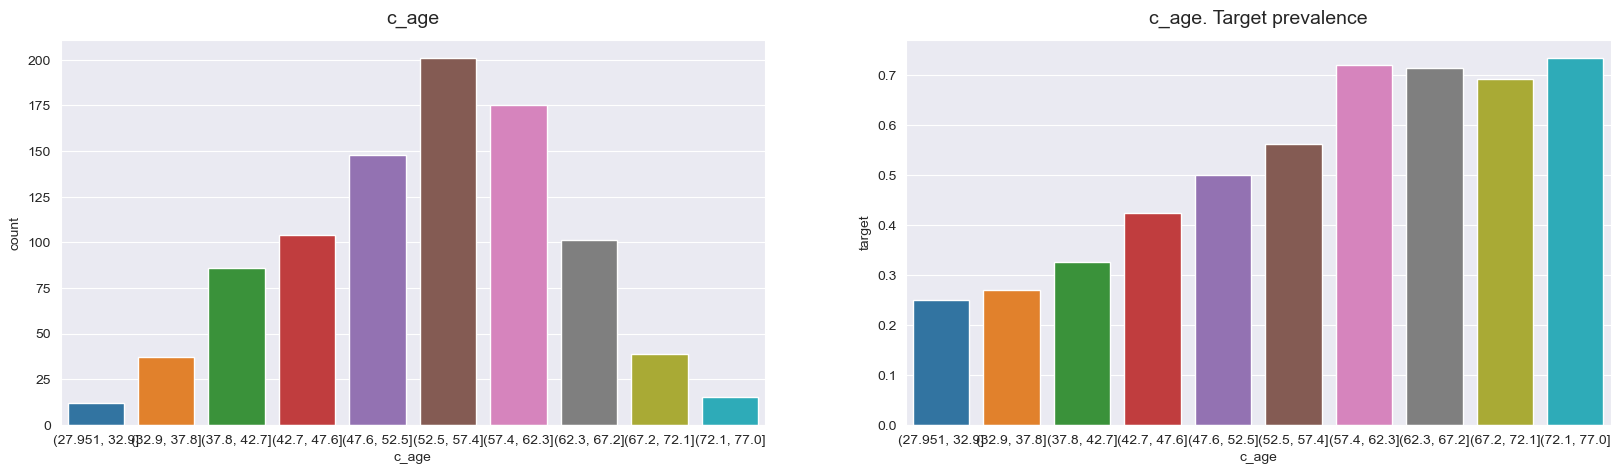

Feature statistics:


count              918
unique              10
top       (52.5, 57.4]
freq               201
Name: c_age, dtype: object

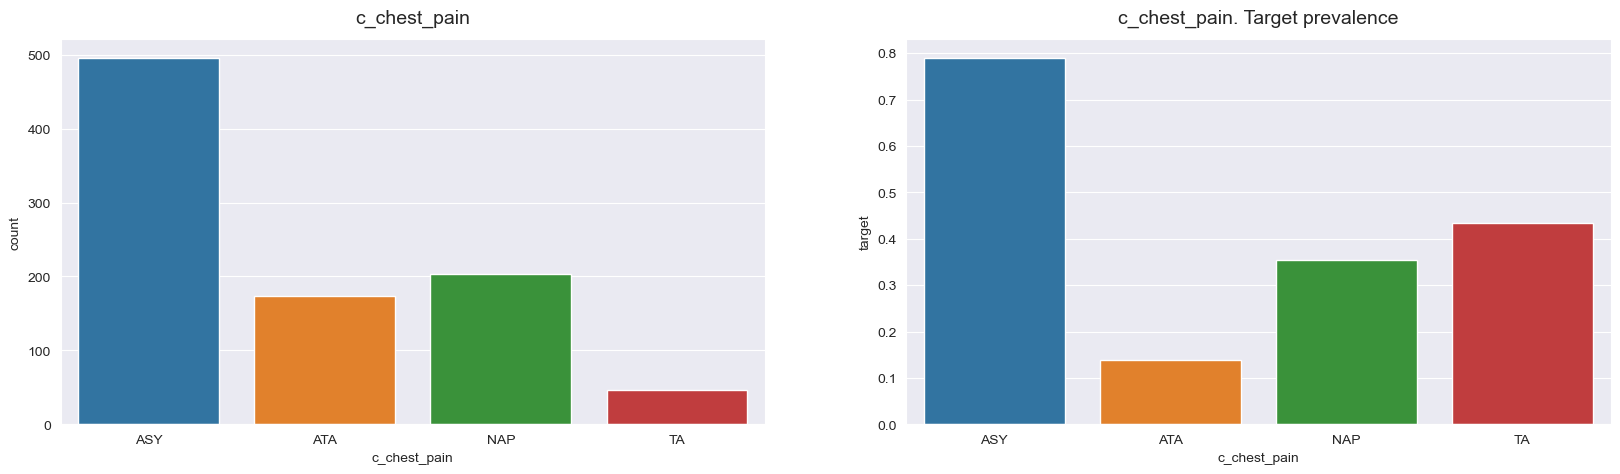

Feature statistics:


count     918
unique      4
top       ASY
freq      496
Name: c_chest_pain, dtype: object

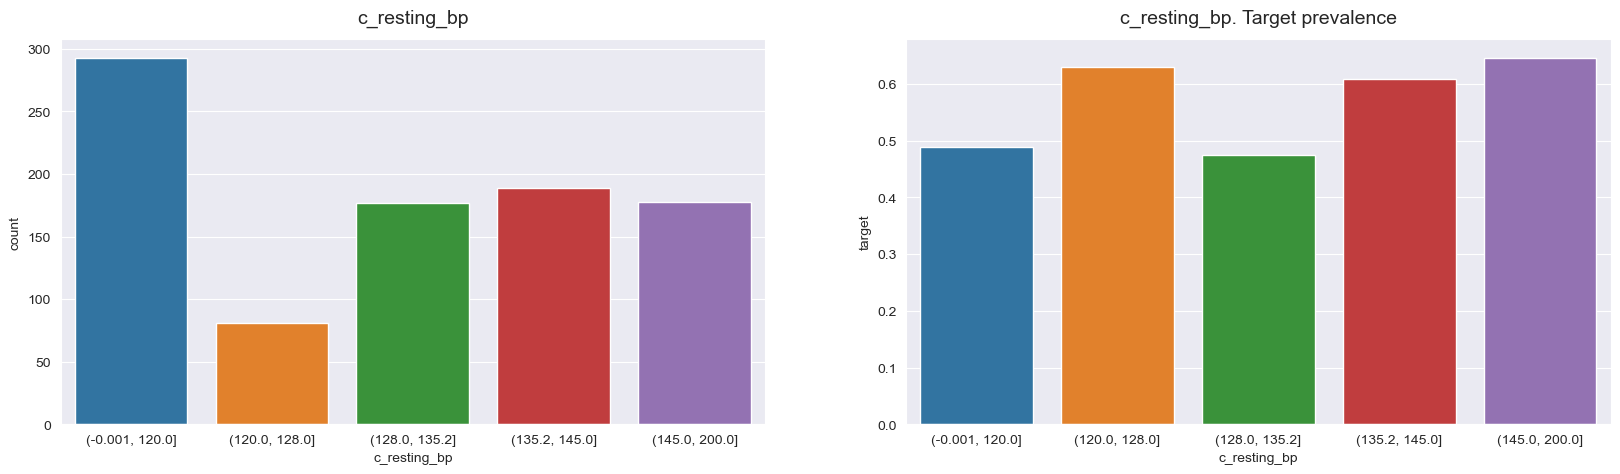

Feature statistics:


count                 918
unique                  5
top       (-0.001, 120.0]
freq                  293
Name: c_resting_bp, dtype: object

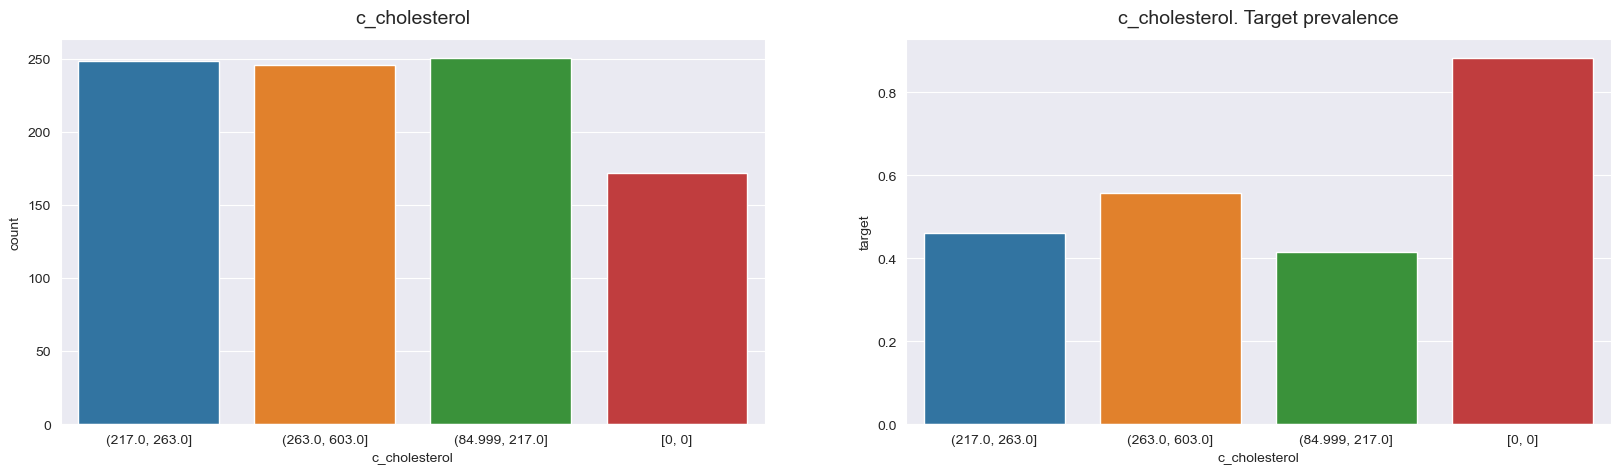

Feature statistics:


count                 918
unique                  4
top       (84.999, 217.0]
freq                  251
Name: c_cholesterol, dtype: object

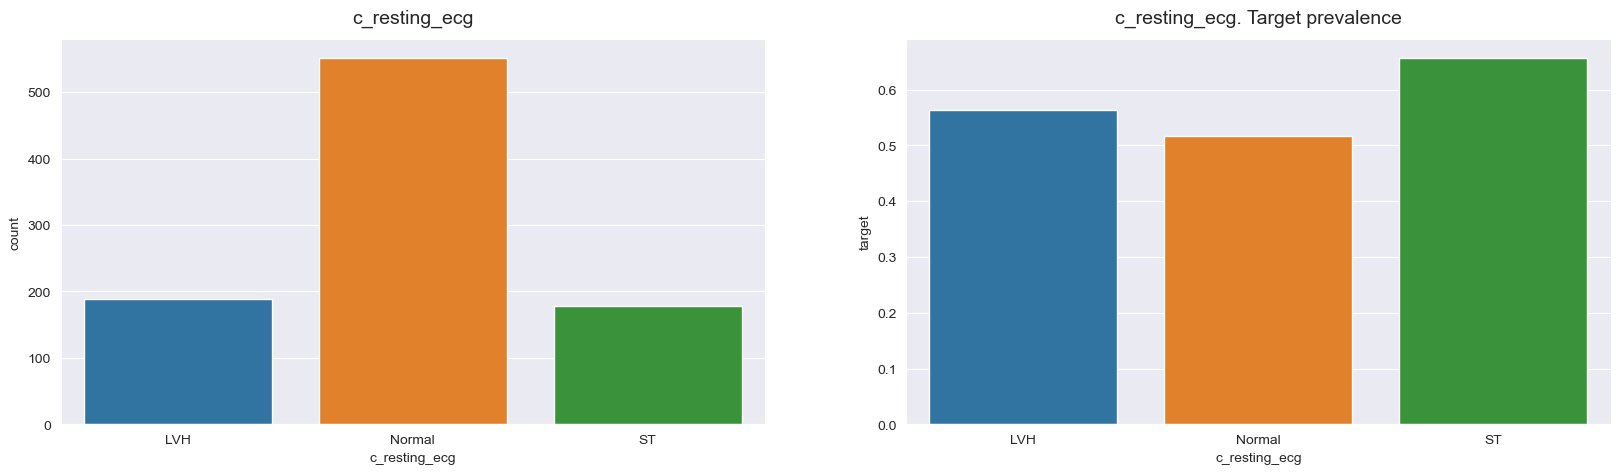

Feature statistics:


count        918
unique         3
top       Normal
freq         552
Name: c_resting_ecg, dtype: object

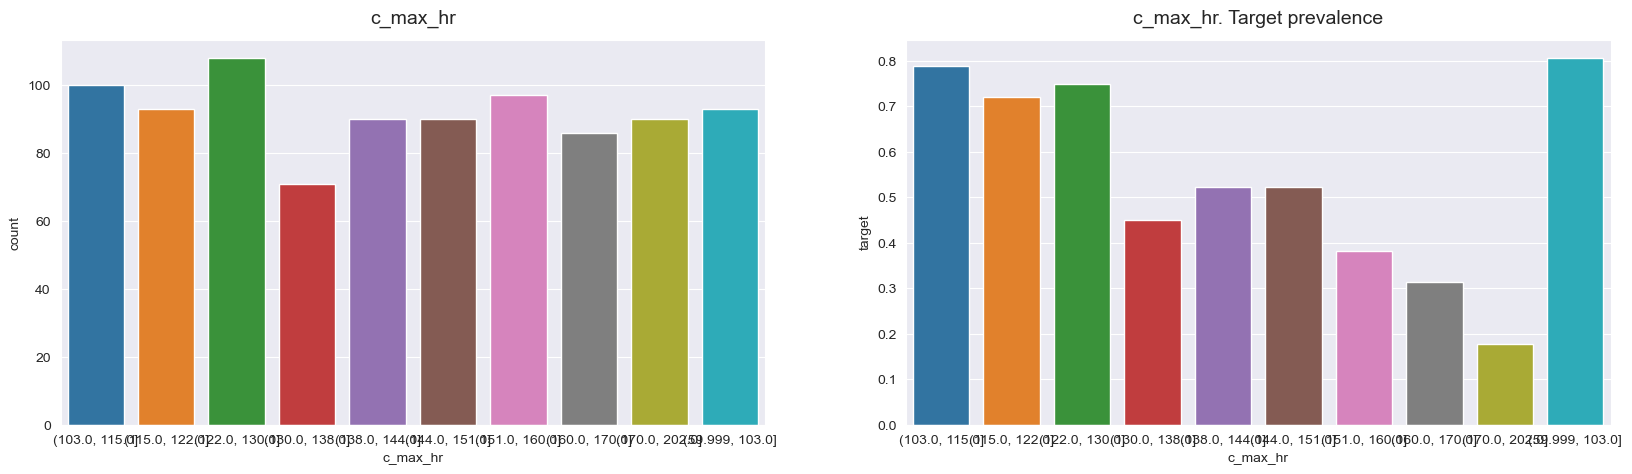

Feature statistics:


count                918
unique                10
top       (122.0, 130.0]
freq                 108
Name: c_max_hr, dtype: object

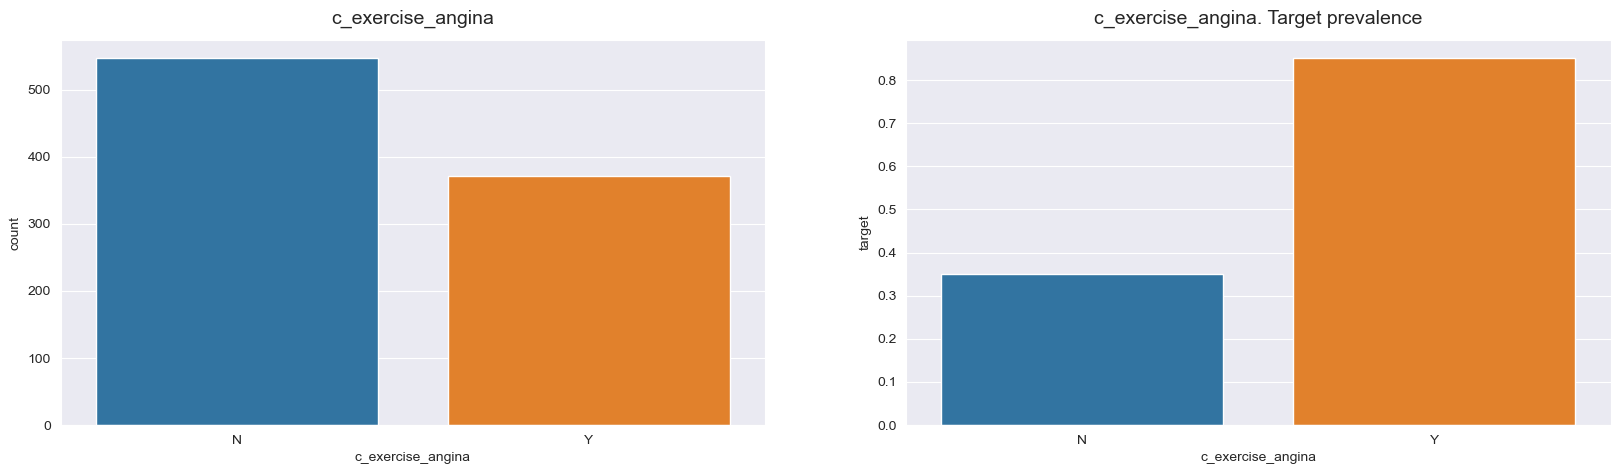

Feature statistics:


count     918
unique      2
top         N
freq      547
Name: c_exercise_angina, dtype: object

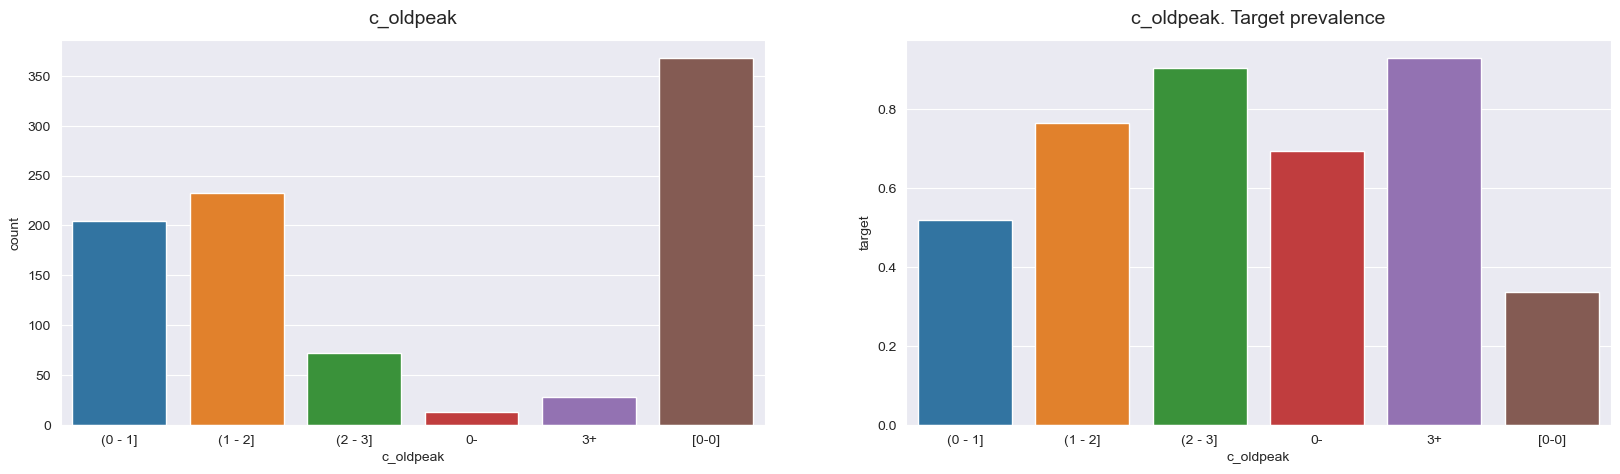

Feature statistics:


count       918
unique        6
top       [0-0]
freq        368
Name: c_oldpeak, dtype: object

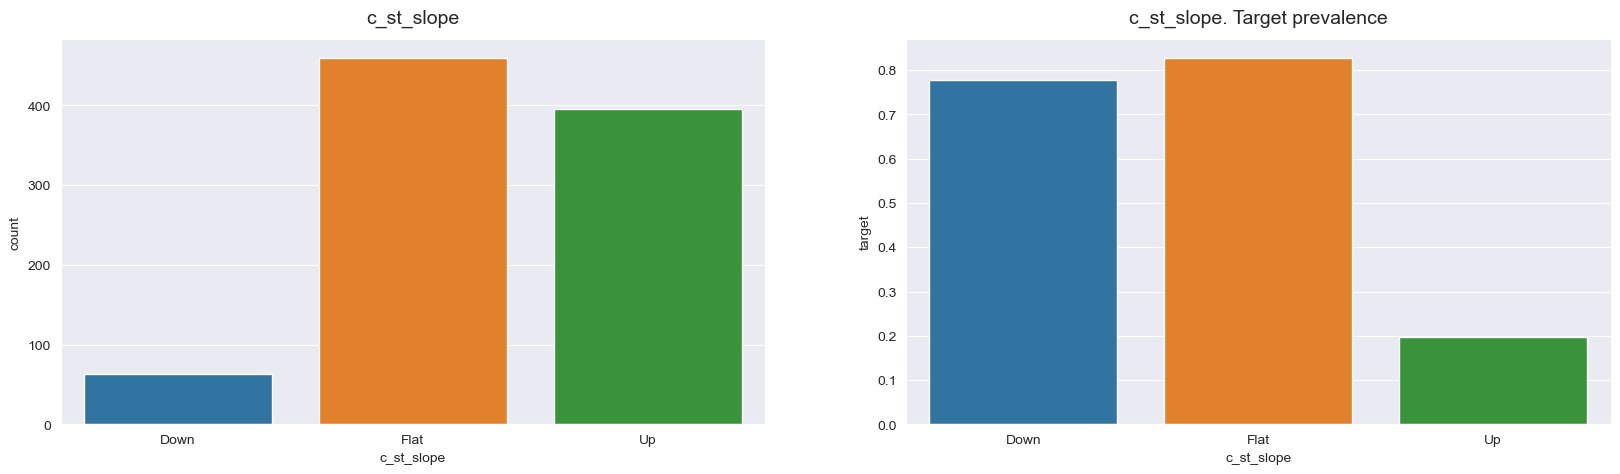

Feature statistics:


count      918
unique       3
top       Flat
freq       460
Name: c_st_slope, dtype: object

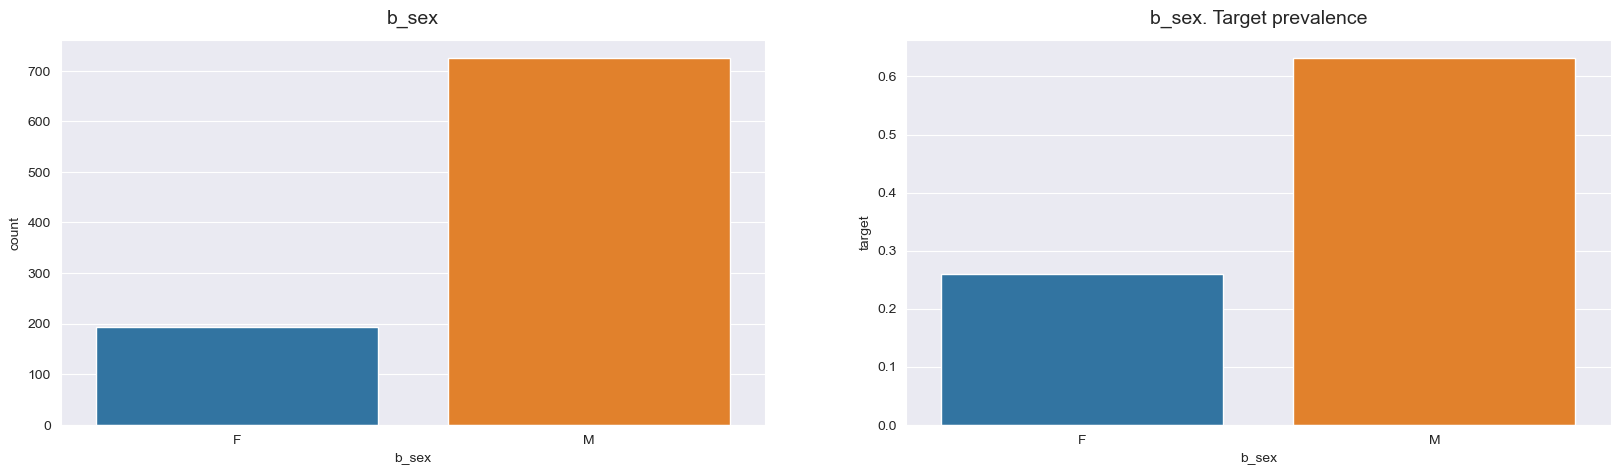

Feature statistics:


count     918
unique      2
top         M
freq      725
Name: b_sex, dtype: object

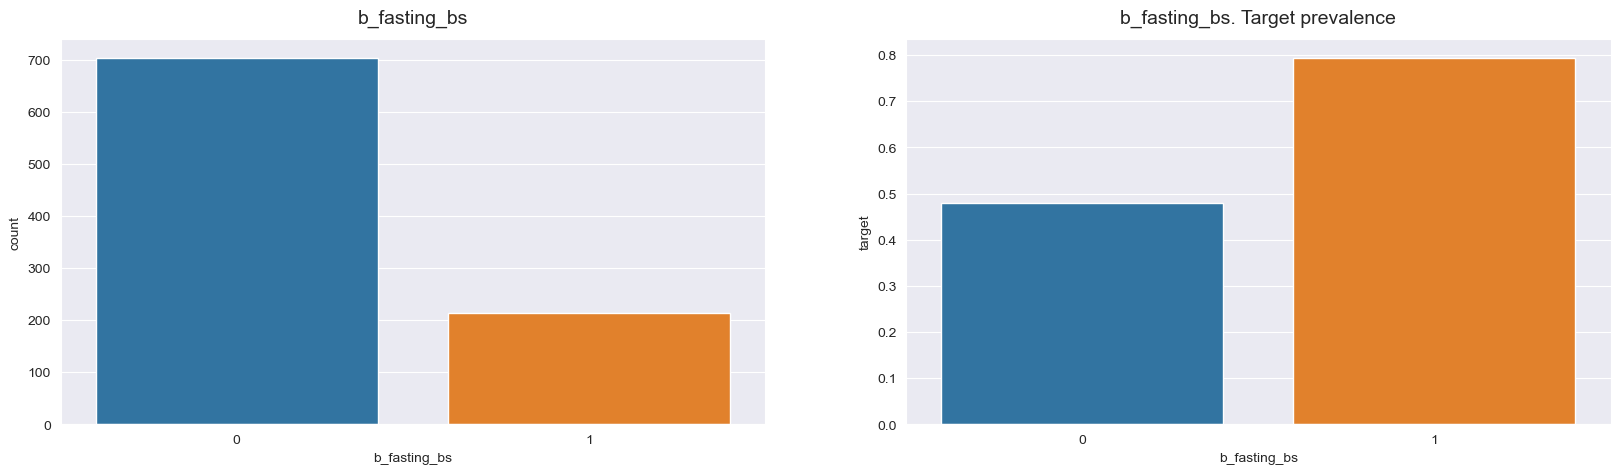

Feature statistics:


count     918
unique      2
top         0
freq      704
Name: b_fasting_bs, dtype: object

In [14]:
create_visualization_cat(prepared_df, target='target', figsize=(20, 5))

# Preprocessing

In [15]:
features = prepared_df.drop('target', axis=1)
target = prepared_df['target']

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25,
                                                                            random_state=Config.RANDOM_STATE,
                                                                            stratify=target)

# CatBoost Model

## Getting / training model

In [17]:
if Config.LOAD_MODEL:
    model = CatBoostClassifier()
    model.load_model(Config.MODEL_PATH, format='json')
else:
    model = get_trained_model(features_train, target_train, features_test, target_test, list(features_train.columns),
                              random_state=Config.RANDOM_STATE, task_type=Config.TASK_TYPE,
                              grid_search=Config.GRID_SEARCH, save=Config.SAVE_MODEL)
    

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## Model evaluation

,metrics,score
0,accuracy,0.886957
1,precision,0.897638
2,recall,0.897638
3,f1,0.897638
4,auc,0.885712


,0,1
0,90,13
1,13,114


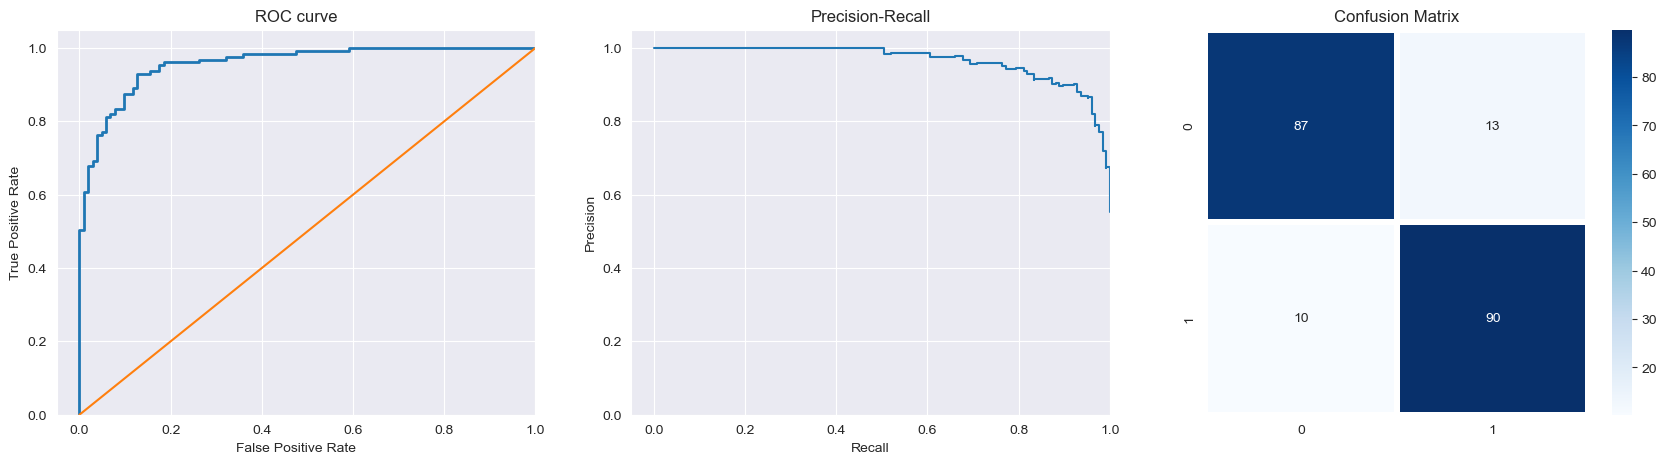

In [18]:
create_metrics(model, features_test, target_test, False)

## Cross validation

In [19]:
cv_res = create_cv(model, features_test, target_test, list(features_train.columns), 10, Config.RANDOM_STATE)
cv_res

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.2588580268
bestIteration = 2303

Training on fold [1/10]

bestTest = 0.2998117049
bestIteration = 1578

Training on fold [2/10]

bestTest = 0.3139323971
bestIteration = 2010

Training on fold [3/10]

bestTest = 0.345416139
bestIteration = 2996

Training on fold [4/10]

bestTest = 0.3849315224
bestIteration = 720

Training on fold [5/10]

bestTest = 0.3406927853
bestIteration = 820

Training on fold [6/10]

bestTest = 0.3105517606
bestIteration = 1131

Training on fold [7/10]

bestTest = 0.231677843
bestIteration = 2988

Training on fold [8/10]

bestTest = 0.2186857751
bestIteration = 2058

Training on fold [9/10]

bestTest = 0.4904801873
bestIteration = 663


,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.690981,0.000603,0.690942,0.000328,0.881352,0.063545
1,1,0.688923,0.000967,0.688806,0.000644,0.909980,0.040360
2,2,0.686697,0.001420,0.686497,0.000925,0.906638,0.040814
3,3,0.684760,0.001478,0.684519,0.000913,0.916474,0.038941
4,4,0.682648,0.001619,0.682353,0.000748,0.920906,0.032702
...,...,...,...,...,...,...,...
2995,2995,0.320586,0.079730,0.160946,0.045294,0.944038,0.033000
2996,2996,0.320578,0.079728,0.160942,0.045299,0.944038,0.033000
2997,2997,0.320584,0.079737,0.160934,0.045309,0.944038,0.033000
2998,2998,0.320579,0.079733,0.160928,0.045315,0.944038,0.033000


### Average AUC, Average AUC-std

In [20]:
print(cv_res['test-AUC-mean'].mean())
print(cv_res['test-AUC-std'].mean())

0.9422673591686092
0.035423448406376595


## Feature importance

### Most important features

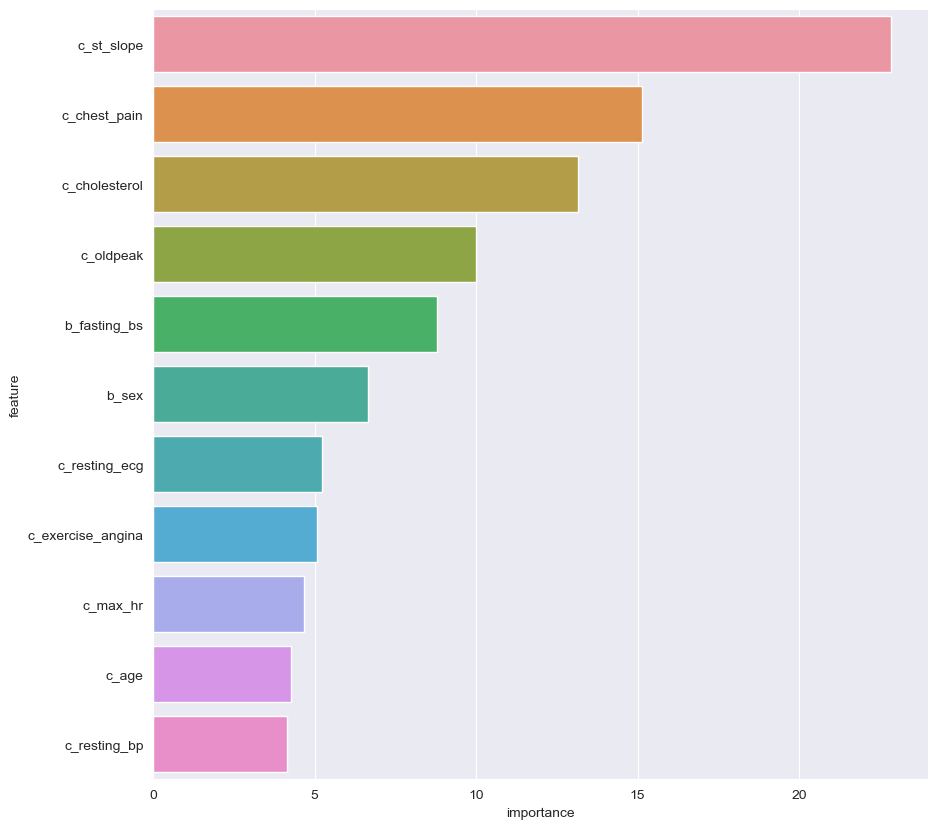

In [21]:
get_features_importances(model, features_train)

### The contribution of each feature

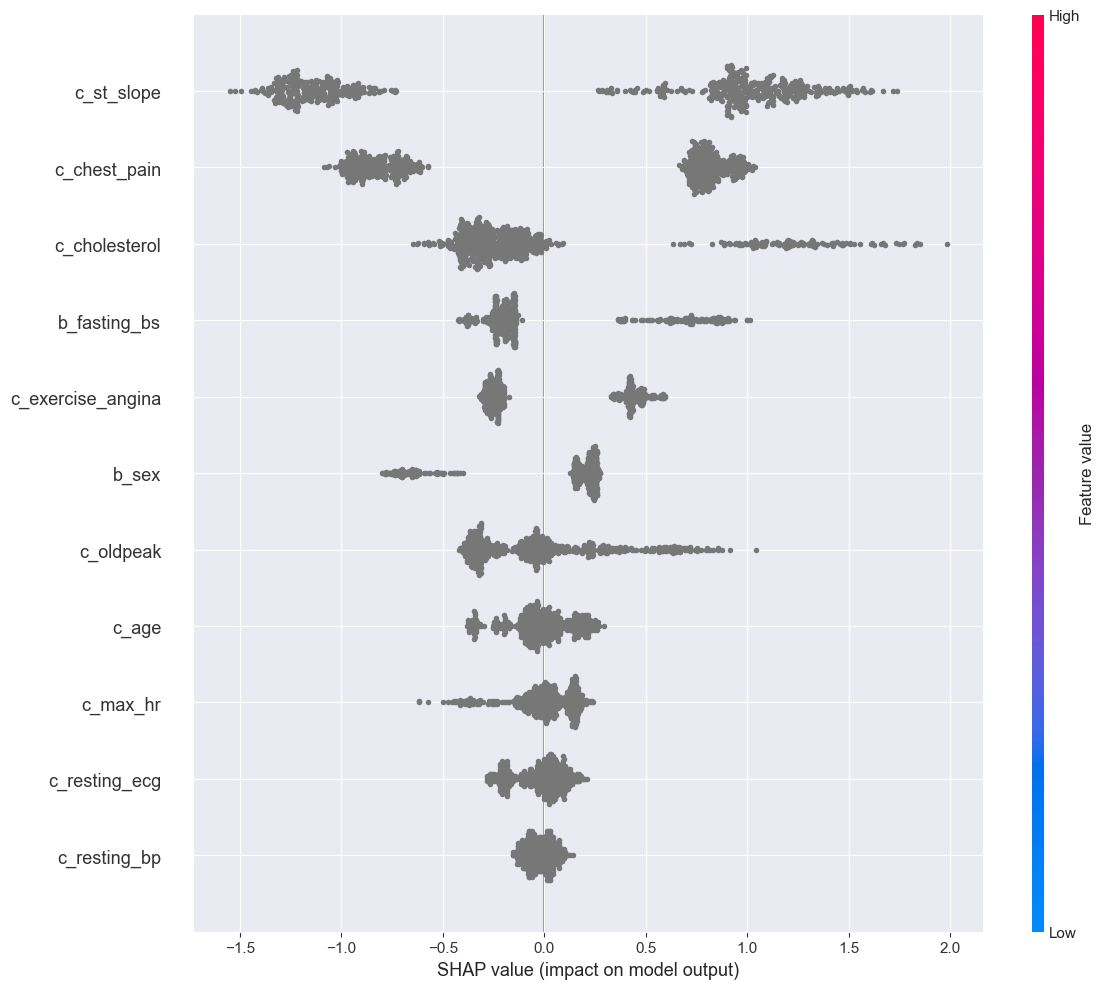

In [22]:
get_shap(model, features_train, target_train)

# Conclusion

In [23]:
create_metrics(model, features_test, target_test, only_result=True)

,metrics,score
0,accuracy,0.886957
1,precision,0.897638
2,recall,0.897638
3,f1,0.897638
4,auc,0.885712
